In [ ]:
import pandas as pd
import os
import numpy as np


month_1 = pd.read_csv("/content/202104-divvy-tripdata.csv")
month_2 = pd.read_csv("/content/202105-divvy-tripdata.csv")
month_3 = pd.read_csv("/content/202106-divvy-tripdata.csv")
month_4 = pd.read_csv("/content/202107-divvy-tripdata.csv")
month_5 = pd.read_csv("/content/202108-divvy-tripdata.csv")
month_6 = pd.read_csv("/content/202109-divvy-tripdata.csv")
month_7 = pd.read_csv("/content/202110-divvy-tripdata.csv")
month_8 = pd.read_csv("/content/202111-divvy-tripdata.csv")
month_9 = pd.read_csv("/content/202112-divvy-tripdata.csv")
month_10 = pd.read_csv("/content/202201-divvy-tripdata.csv")
month_11 = pd.read_csv("/content/202202-divvy-tripdata.csv")
month_12 = pd.read_csv("/content/202203-divvy-tripdata.csv")

In [ ]:
df = [month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12]
month_data = pd.concat(df)
month_data = month_data.to_csv("merged_month_data.csv")



In [ ]:
import pandas as pd
from google.colab import files
try:
    merged_data = pd.read_csv('/content/merged_month_data.csv')
    print("File loaded successfully.")
except FileNotFoundError:
    print("Error: 'merged_month_data.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Download the file using files.download()
files.download('merged_month_data.csv')

File loaded successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(merged_data.head())

   Unnamed: 0           ride_id rideable_type           started_at  \
0           0  6C992BD37A98A63F  classic_bike  2021-04-12 18:25:36   
1           1  1E0145613A209000   docked_bike  2021-04-27 17:27:11   
2           2  E498E15508A80BAD   docked_bike  2021-04-03 12:42:45   
3           3  1887262AD101C604  classic_bike  2021-04-17 09:17:42   
4           4  C123548CAB2A32A5   docked_bike  2021-04-03 12:42:25   

              ended_at        start_station_name start_station_id  \
0  2021-04-12 18:56:55     State St & Pearson St     TA1307000061   
1  2021-04-27 18:31:29  Dorchester Ave & 49th St     KA1503000069   
2  2021-04-07 11:40:24     Loomis Blvd & 84th St            20121   
3  2021-04-17 09:42:48   Honore St & Division St     TA1305000034   
4  2021-04-03 14:13:42     Loomis Blvd & 84th St            20121   

               end_station_name end_station_id  start_lat  start_lng  \
0  Southport Ave & Waveland Ave          13235  41.897448 -87.628722   
1      Dorchester Av

In [ ]:
print(merged_data.tail())

         Unnamed: 0           ride_id  rideable_type           started_at  \
5723527      284037  E23BE3DB740BE3B4    docked_bike  2022-03-13 16:31:03   
5723528      284038  15AF71F3220F2A75    docked_bike  2022-03-09 06:56:02   
5723529      284039  9C4CE6CC19F8225B  electric_bike  2022-03-09 15:55:26   
5723530      284040  F4E136DEF696F3AE  electric_bike  2022-03-21 16:12:44   
5723531      284041  5AEC5F39AF711895   classic_bike  2022-03-03 18:13:40   

                    ended_at      start_station_name start_station_id  \
5723527  2022-03-13 16:39:32   Michigan Ave & Oak St            13042   
5723528  2022-03-09 07:42:14    Broadway & Barry Ave            13137   
5723529  2022-03-09 16:08:54                     NaN              NaN   
5723530  2022-03-21 16:18:24                     NaN              NaN   
5723531  2022-03-03 18:23:39  Clark St & Randolph St     TA1305000030   

                     end_station_name end_station_id  start_lat  start_lng  \
5723527       Street

In [ ]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 611.3+ MB
None


In [ ]:
# Drop the 'Unnamed: 0' column
merged_data = merged_data.drop(columns=['Unnamed: 0'])

# Confirm the column has been removed
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB
None


In [ ]:
# split the data column

merged_data['started_at']=pd.to_datetime(merged_data['started_at'], errors='coerce')
merged_data['ended_at']=pd.to_datetime(merged_data['ended_at'], errors='coerce')

merged_data['started_at_date']=pd.to_datetime(merged_data['started_at']).dt.date
merged_data['started_at_time']=pd.to_datetime(merged_data['started_at']).dt.time

merged_data['ended_at_date']=pd.to_datetime(merged_data['ended_at']).dt.date
merged_data['ended_at_time']=pd.to_datetime(merged_data['ended_at']).dt.time

print (merged_data.info
       )

<bound method DataFrame.info of                   ride_id  rideable_type          started_at  \
0        6C992BD37A98A63F   classic_bike 2021-04-12 18:25:36   
1        1E0145613A209000    docked_bike 2021-04-27 17:27:11   
2        E498E15508A80BAD    docked_bike 2021-04-03 12:42:45   
3        1887262AD101C604   classic_bike 2021-04-17 09:17:42   
4        C123548CAB2A32A5    docked_bike 2021-04-03 12:42:25   
...                   ...            ...                 ...   
5723527  E23BE3DB740BE3B4    docked_bike 2022-03-13 16:31:03   
5723528  15AF71F3220F2A75    docked_bike 2022-03-09 06:56:02   
5723529  9C4CE6CC19F8225B  electric_bike 2022-03-09 15:55:26   
5723530  F4E136DEF696F3AE  electric_bike 2022-03-21 16:12:44   
5723531  5AEC5F39AF711895   classic_bike 2022-03-03 18:13:40   

                   ended_at        start_station_name start_station_id  \
0       2021-04-12 18:56:55     State St & Pearson St     TA1307000061   
1       2021-04-27 18:31:29  Dorchester Ave & 49th 

In [ ]:
# Only using the columns we need for the analysis

# merged_data=merged_data.loc[:,['ride_id','rideable_type','started_at','started_at_date','started_at_time','ended_at','ended_at_date','ended_at_time','start_station_name','start_station_id','end_station_name','end_station_id','member_casual']]

In [ ]:
print (merged_data.describe())

                          started_at                       ended_at
count                        5723532                        5723532
mean   2021-08-26 22:25:18.392216832  2021-08-26 22:46:50.937537792
min              2021-04-01 00:03:18            2021-04-01 00:14:29
25%       2021-06-22 15:20:26.500000            2021-06-22 15:47:37
50%              2021-08-17 18:25:49     2021-08-17 18:44:32.500000
75%       2021-10-14 19:48:10.500000     2021-10-14 20:03:28.500000
max              2022-03-31 23:59:47            2022-04-01 22:10:12


In [ ]:
print (merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   started_at_date     object        
 4   started_at_time     object        
 5   ended_at            datetime64[ns]
 6   ended_at_date       object        
 7   ended_at_time       object        
 8   start_station_name  object        
 9   start_station_id    object        
 10  end_station_name    object        
 11  end_station_id      object        
 12  member_casual       object        
dtypes: datetime64[ns](2), object(11)
memory usage: 567.7+ MB
None


In [ ]:
merged_data.member_casual.value_counts()

,count
member_casual,
member,3176990
casual,2546542


In [ ]:
# Members riding on the weekdays
members_weekday_rides = merged_data.loc[(merged_data.member_casual == 'member') & (merged_data.started_at.dt.dayofweek < 5)] # Monday=0, Sunday=6

#print(members_weekday_rides.head())
#print (members_weekday_rides.info())

In [ ]:
print (members_weekday_rides.describe())

                          started_at                       ended_at
count                        2357917                        2357917
mean   2021-09-08 22:29:31.698820352  2021-09-08 22:42:16.562559744
min              2021-04-01 00:03:18            2021-04-01 00:14:29
25%              2021-06-29 20:15:02            2021-06-29 20:28:44
50%              2021-09-01 18:55:35            2021-09-01 19:09:14
75%              2021-11-04 18:18:17            2021-11-04 18:30:04
max              2022-03-31 23:59:47            2022-04-01 14:52:43


74.22% of member rides are on weekdays.


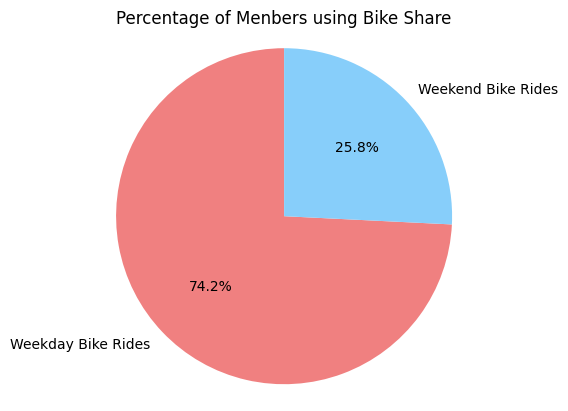

In [ ]:
#Percentage of bikeshare users on weekend and weekday

# Calculate the total number of member rides
total_member_rides = len(merged_data[merged_data.member_casual == 'member'])

# Calculate the number of member rides on weekdays
weekday_member_rides = len(members_weekday_rides)

# Calculate the percentage of member rides on weekdays
weekday_percentage = (weekday_member_rides / total_member_rides) * 100

#Represent the result
print(f"{weekday_percentage:.2f}% of member rides are on weekdays.")

#Alternative representation using a bar chart (requires matplotlib)
import matplotlib.pyplot as plt

labels = ['Weekday Bike Rides', 'Weekend Bike Rides']
sizes = [weekday_percentage, 100 - weekday_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Menbers using Bike Share')
plt.show()

In [ ]:


# Convert 'started_at' to datetime if not already done
merged_data['started_at'] = pd.to_datetime(merged_data['started_at'])

# Create a 'season' column based on the month
merged_data['season'] = (merged_data['started_at'].dt.month % 12 + 3) // 3
# Spring = 1, Summer = 2, Autumn = 3, Winter = 4

season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Autumn',
    4: 'Winter'
}
merged_data['season_name'] = merged_data['season'].map(season_mapping)


# Group by season and user type, then count rides
ride_counts = merged_data.groupby(['season_name', 'member_casual'])['ride_id'].count().reset_index()

print (ride_counts)

  season_name member_casual  ride_id
0      Autumn        casual  1225408
1      Autumn        member  1130949
2      Spring        casual   109674
3      Spring        member   357245
4      Summer        casual   483399
5      Summer        member   669506
6      Winter        casual   728061
7      Winter        member  1019290


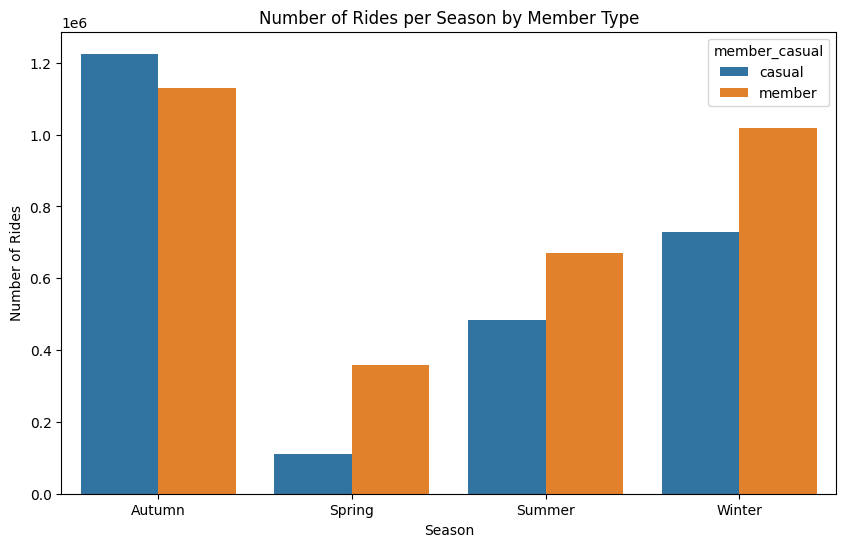

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ride_counts' DataFrame is already created as in your previous code

# Create the plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='season_name', y='ride_id', hue='member_casual', data=ride_counts)
plt.xlabel('Season')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Season by Member Type')
plt.show()

    month member_casual  ride_count
0       1        casual       18520
1       1        member       85250
2       2        casual       21416
3       2        member       94193
4       3        casual       89882
5       3        member      194160
6       4        casual      136601
7       4        member      200629
8       5        casual      256916
9       5        member      274717
10      6        casual      370681
11      6        member      358914
12      7        casual      442056
13      7        member      380354
14      8        casual      412671
15      8        member      391681
16      9        casual      363890
17      9        member      392257
18     10        casual      257242
19     10        member      373984
20     11        casual      106929
21     11        member      253049
22     12        casual       69738
23     12        member      177802


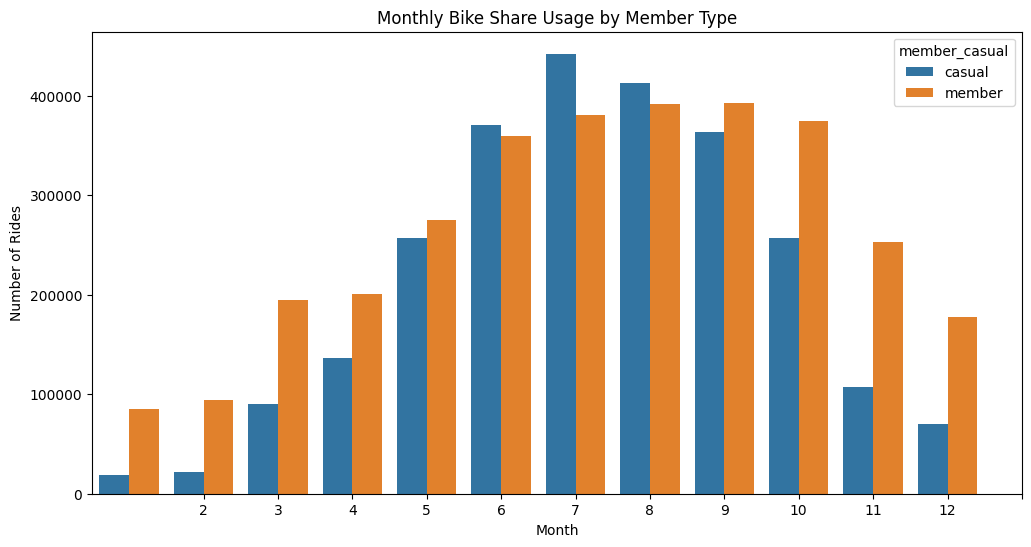

In [ ]:

# Convert 'started_at' to datetime if not already done
merged_data['started_at'] = pd.to_datetime(merged_data['started_at'])

# Extract the month from the 'started_at' column
merged_data['month'] = merged_data['started_at'].dt.month

# Group by month and user type, then count rides
monthly_rides = merged_data.groupby(['month', 'member_casual'])['ride_id'].count().reset_index()

# Rename the 'ride_id' column to 'ride_count' for clarity
monthly_rides.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Print the resulting DataFrame
print(monthly_rides)


# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='ride_count', hue='member_casual', data=monthly_rides)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Monthly Bike Share Usage by Member Type')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.show()

   season_name member_casual  rideable_type  ride_count
0       Autumn        casual   classic_bike      659722
1       Autumn        casual    docked_bike      154479
2       Autumn        casual  electric_bike      411207
3       Autumn        member   classic_bike      785240
4       Autumn        member  electric_bike      345709
5       Spring        casual   classic_bike       34887
6       Spring        casual    docked_bike        7250
7       Spring        casual  electric_bike       67537
8       Spring        member   classic_bike      180229
9       Spring        member  electric_bike      177016
10      Summer        casual   classic_bike      230113
11      Summer        casual    docked_bike       76425
12      Summer        casual  electric_bike      176861
13      Summer        member   classic_bike      428038
14      Summer        member  electric_bike      241468
15      Winter        casual   classic_bike      332921
16      Winter        casual    docked_bike     

<ipython-input-80-351d62076129>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season_name', y='ride_count', hue='rideable_type', data=bike_season_counts, ci=None) #ci=None removes error bars


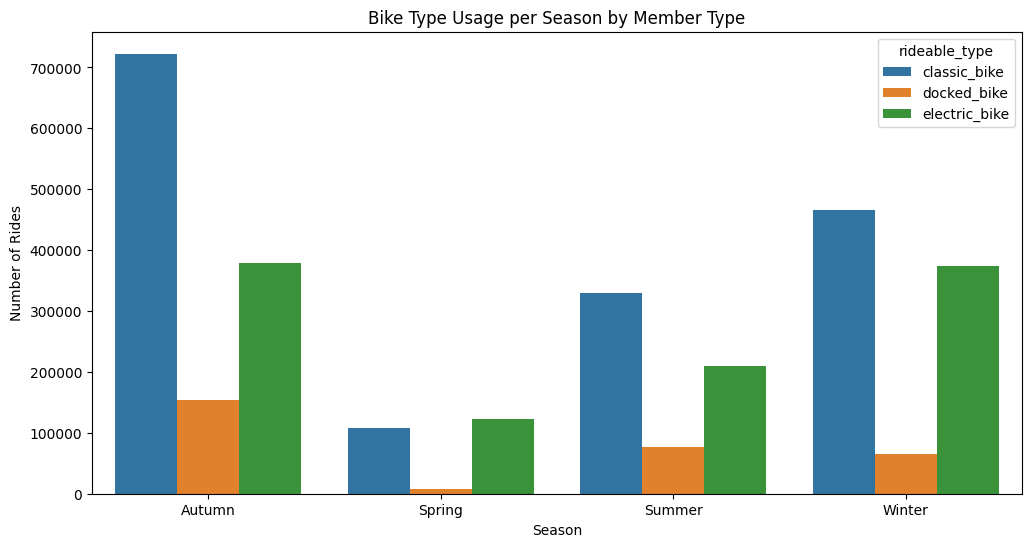

In [ ]:
# Group by season, user type, and bike type, then count rides
bike_season_counts = merged_data.groupby(['season_name', 'member_casual', 'rideable_type'])['ride_id'].count().reset_index()

# Rename the 'ride_id' column to 'ride_count' for clarity
bike_season_counts.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Print the resulting DataFrame
print(bike_season_counts)

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='season_name', y='ride_count', hue='rideable_type', data=bike_season_counts, ci=None) #ci=None removes error bars
plt.xlabel('Season')
plt.ylabel('Number of Rides')
plt.title('Bike Type Usage per Season by Member Type')
plt.show()